<a href="https://colab.research.google.com/github/lukekratz/testdir/blob/main/pothole_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Apr  3 15:32:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.9/235.7 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
%cd {HOME}
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ivk7YbfjGjg4wHUBbHHX")
project = rf.workspace("myworkspace-iccn4").project("pothole-detect-ccd3t")
version = project.version(1)
dataset = version.download("yolov8")

/content
loading Roboflow workspace...
loading Roboflow project...


In [6]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=40 imgsz=800 plots=True

/content
100% 6.25M/6.25M [00:00<00:00, 123MB/s]
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/pothole-detect-1/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

/content


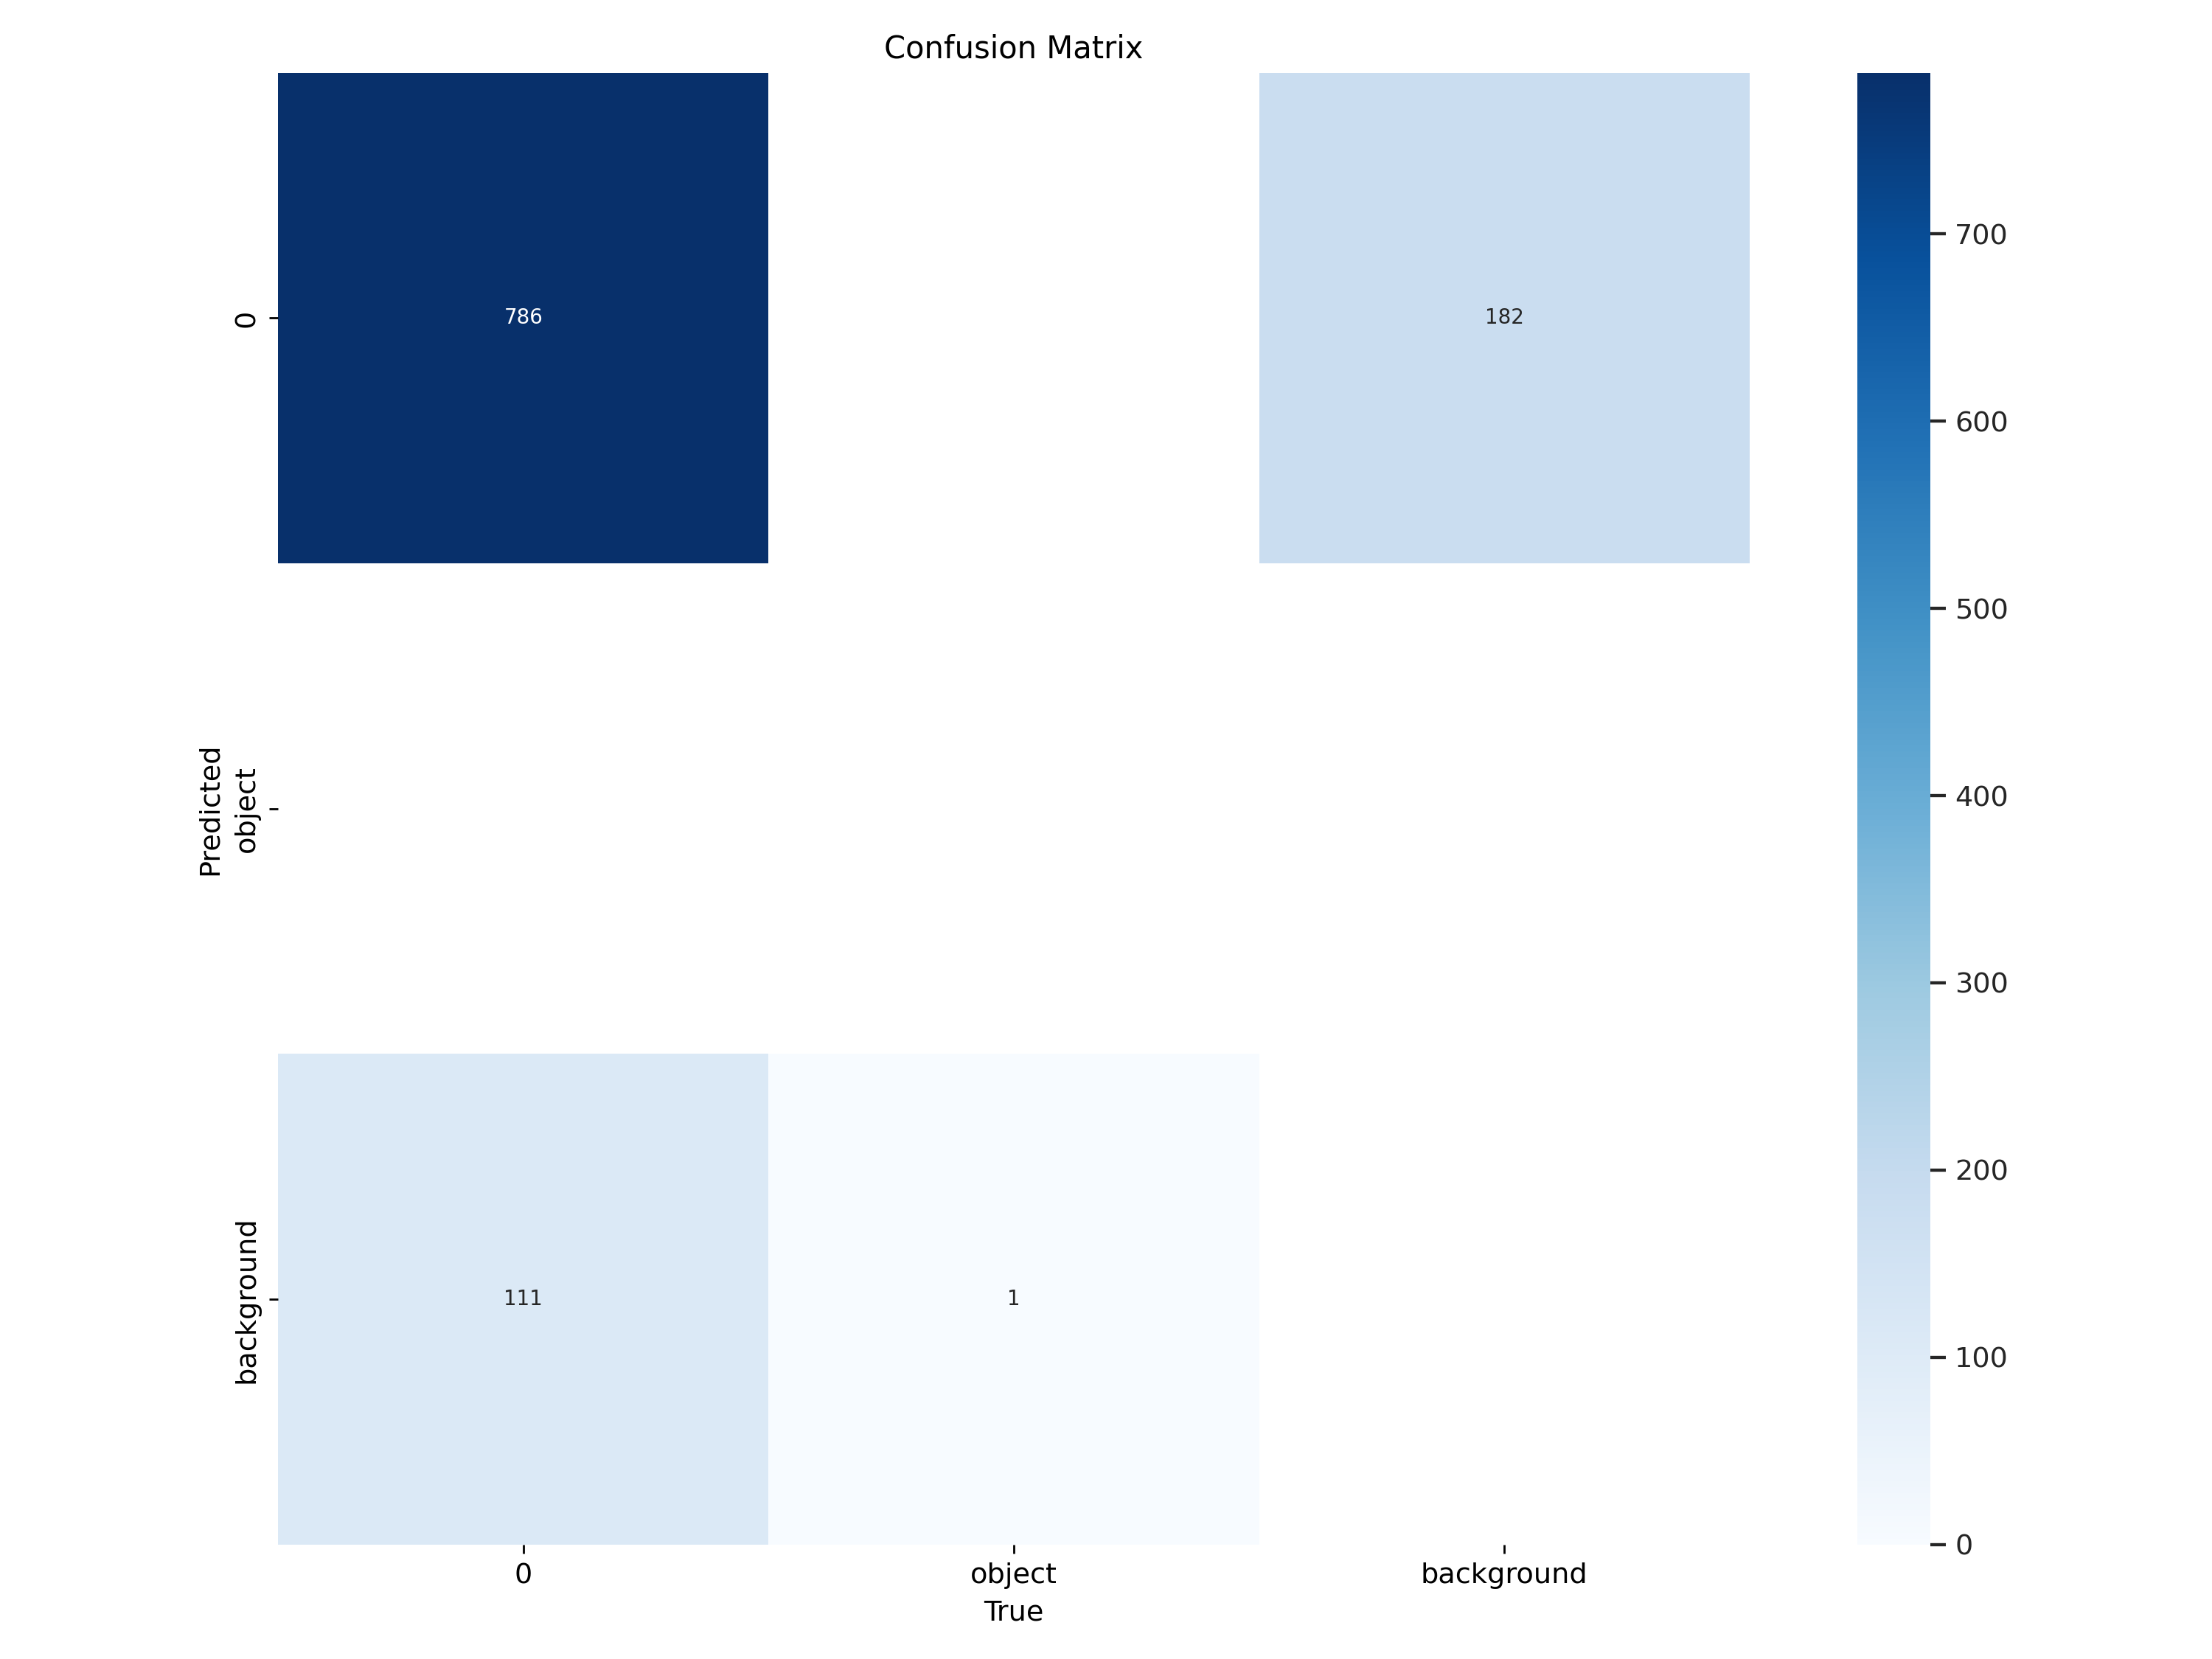

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png',width=600)

/content


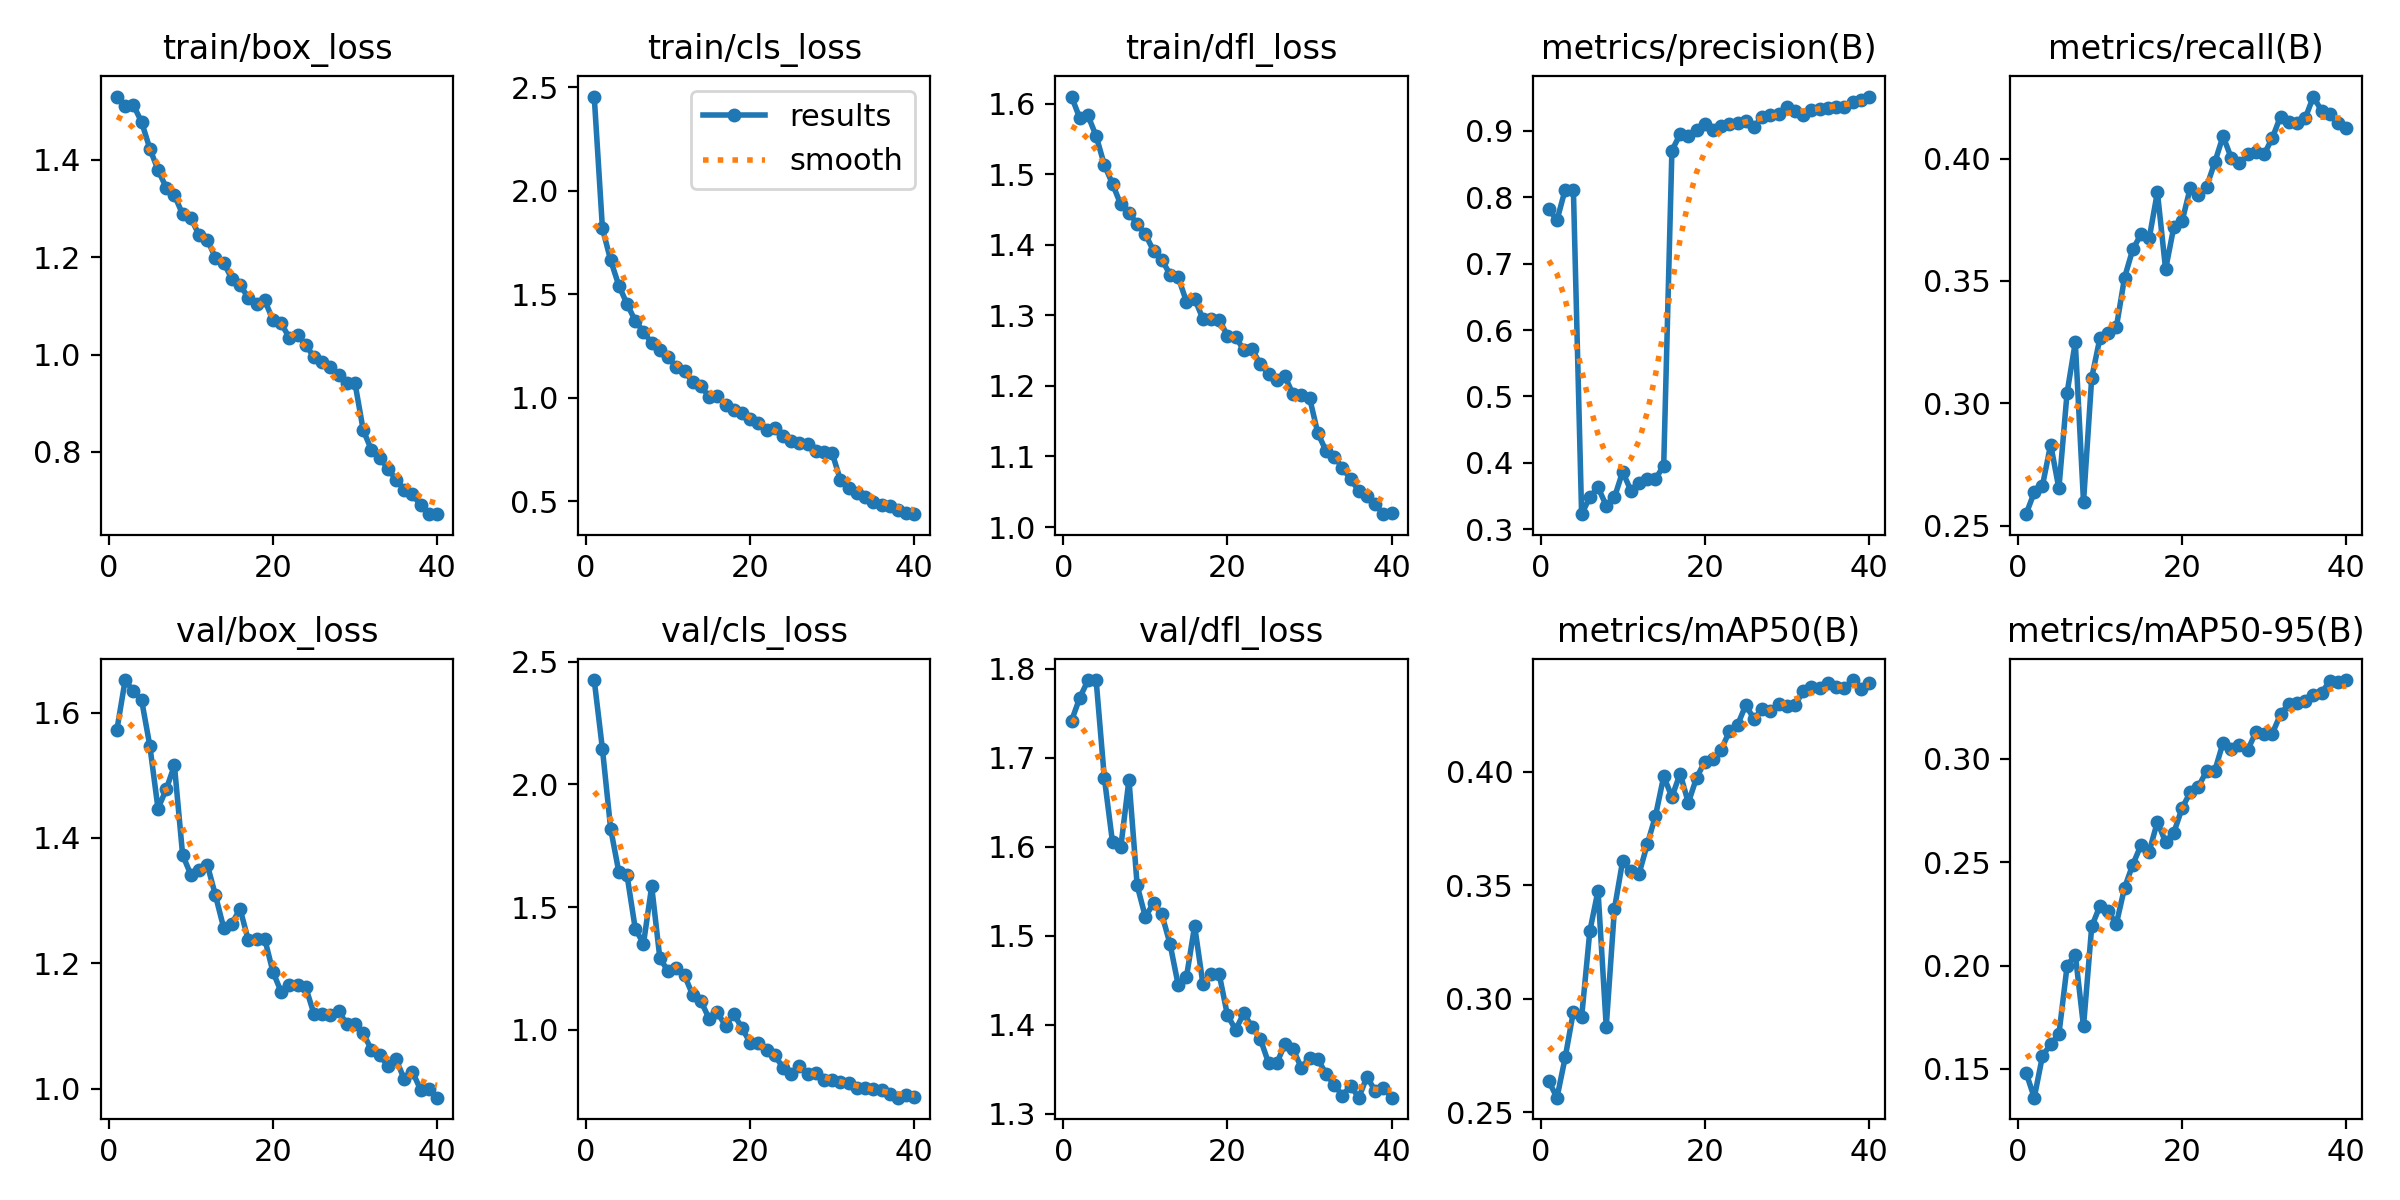

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [9]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/pothole-detect-1/valid/labels.cache... 399 images, 0 backgrounds, 0 corrupt: 100% 399/399 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 25/25 [00:06<00:00,  4.13it/s]
                   all        399        898      0.952      0.413      0.439      0.338
                     0        398        897      0.904      0.826      0.878      0.676
                object          1          1          1          0          0          0
Speed: 2.5ms preprocess, 6.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [10]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True

/content
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/201 /content/pothole-detect-1/test/images/Pothole-001_jpg.rf.959d7a7ab8267a1ac59a5df789032269.jpg: 800x800 1 0, 10.2ms
image 2/201 /content/pothole-detect-1/test/images/Pothole-038_jpg.rf.26516cf8f94421d1c7d1e721a9fdcfb3.jpg: 800x800 1 0, 10.1ms
image 3/201 /content/pothole-detect-1/test/images/Pothole-052_jpg.rf.f6379b6fd5669352d3f26548874294c6.jpg: 800x800 1 0, 10.0ms
image 4/201 /content/pothole-detect-1/test/images/Pothole-076_jpg.rf.30c3b9a06ffeac0ce10a27290f11af8b.jpg: 800x800 2 0s, 10.0ms
image 5/201 /content/pothole-detect-1/test/images/Pothole-134_jpg.rf.d8eb35436193c61a5651267fd94e5aff.jpg: 800x800 1 0, 10.0ms
image 6/201 /content/pothole-detect-1/test/images/Pothole-146_jpg.rf.7fecf72eeb4b4ebd24b41aba65f255c5.jpg: 800x800 3 0s, 10.0ms
image 7/201 /content/pothole-detect-1/test/images/Pothole-148_j

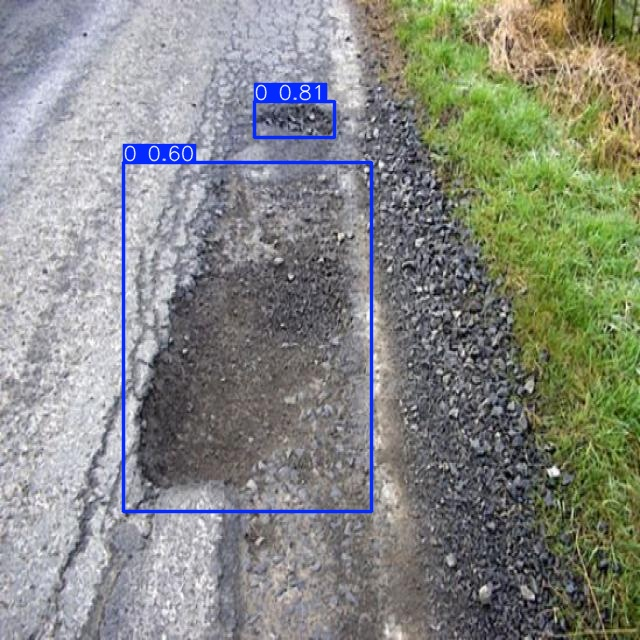

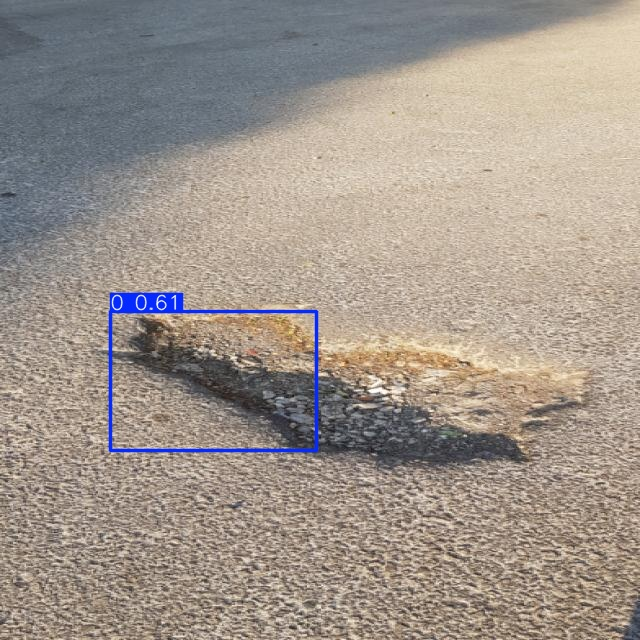

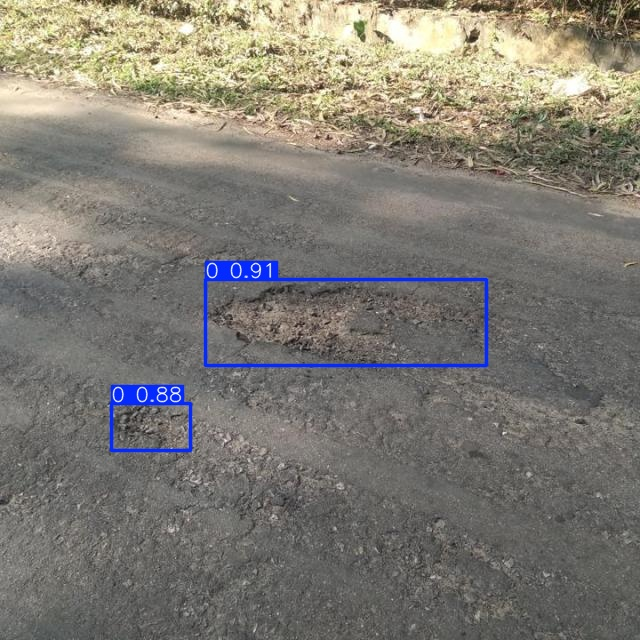

In [12]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base_path
subholders = [os.path.join(base_path, d) for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# find the latest folder by modification time
latest_folder = max(subholders, key=os.path.getmtime)
image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
  display(Image(filename=image_path,width=600))
  print('\n')